In [1]:
#Importing libraries 
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture 
from sklearn.datasets import make_blobs

In [2]:
#Importing standard scipy libraries
from scipy import stats
from scipy.stats import mstats  
from scipy.spatial import Voronoi, voronoi_plot_2d

In [3]:
#importing standard libraries
import matplotlib.pyplot as plt
%matplotlib inline 
import numpy as np
import pandas as pd

In [4]:
#Download Iris datasets
data = load_iris()
feature_names = ['sepal_length','sepal_width','petal_length','petal_width']
df = pd.DataFrame(data = data.data,columns=feature_names)
df.head()
df['target'] = data.target
df

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [5]:
#Guassian Mixture Model
gnm = GaussianMixture(n_components=3,random_state=0).fit(data.data)
gnm_cluster_labels = gnm.predict(data.data)
#gnm_cluster_labels
df['gnm_cluster'] = gnm_cluster_labels
df_result = df.groupby(['target'])['gnm_cluster'].value_counts()
df_result

target  gnm_cluster
0       0              50
1       1              45
        2               5
2       2              50
Name: gnm_cluster, dtype: int64

In [6]:
gnm.fit(df)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=3, n_init=1, precisions_init=None,
                random_state=0, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [7]:
#Ratio value 
np.sum(df['gnm_cluster']==df['target'])/len(df['gnm_cluster'])

0.9666666666666667

In [8]:
df[df['target'] == 0] = df[df['target'] == 0].replace(df['gnm_cluster'],0)
df[df['target'] == 1] = df[df['target'] == 1].replace(df['gnm_cluster'],1)
df[df['target'] == 2] = df[df['target'] == 2].replace(df['gnm_cluster'],2)

In [9]:
#Genrating Blob from new dataset
blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])
X,y = make_blobs(n_samples=2000,n_features =3,centers=blob_centers,cluster_std = blob_std,random_state=0)

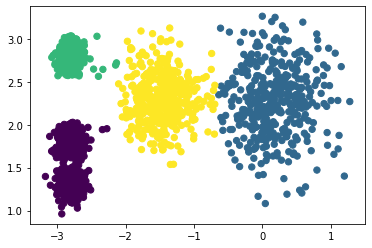

In [10]:
#ploting blobs
kmeans = KMeans(4, random_state=0)
labels = kmeans.fit(X).predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis');

In [11]:
#Training with kMeans model
#kmeans_model = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
kmeans_model = KMeans(n_clusters=5)
y_kmeans = kmeans_model.fit_predict(X)

In [12]:
#Centroid of blobs for k = 5
kmeans_model.cluster_centers_

array([[-2.80446936,  1.79959228],
       [ 0.17864202,  2.27506362],
       [-1.46332098,  2.31083369],
       [-2.80180006,  2.79464334],
       [-2.80379109,  1.30017997]])

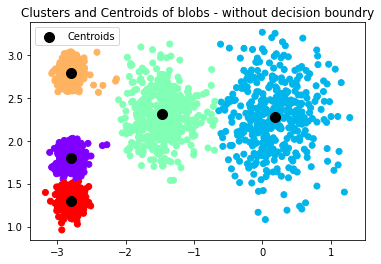

In [13]:
#Visualising the clusters
plt.title("Clusters and Centroids of blobs - without decision boundry")
plt.scatter(X[:,0], X[:,1], c = kmeans_model.labels_, cmap="rainbow")

#Plotting the centroids of the clusters
plt.scatter(kmeans_model.cluster_centers_[:, 0], kmeans_model.cluster_centers_[:,1], s = 100, c = 'black', label = 'Centroids')

plt.legend()

In [14]:
# Given data points - Test
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])

# Predicting labels of new instance
kmeans_model.predict(X_new)

array([1, 1, 3, 3], dtype=int32)

Text(0.5, 1.0, 'Desision Boundaries')

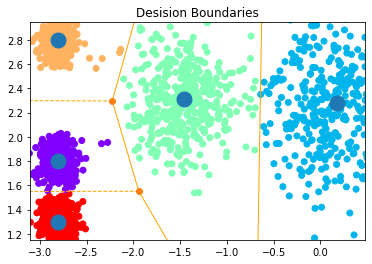

In [15]:
#Plotting boundaries 
vor = Voronoi(kmeans_model.cluster_centers_)
voronoi_plot_2d(vor, point_size = 30, line_colors='orange')
plt.scatter(X[:,0], X[:,1], c = kmeans_model.labels_, cmap="rainbow")
plt.title("Desision Boundaries")

In [16]:
#General function for multiple k values
def k_models(i):
  string_i = str(i)
  k = KMeans(n_clusters=i)
  k.fit_predict(X)
  print("Centroid for n_clusters=",str(i))
  print(k.cluster_centers_)
  q = k.inertia_
  print("\nInteria value for k=",string_i,"is: ",q)
  #Plot respective centrois and blobs
  print("\n\n")
  plt.scatter(X[:,0], X[:,1], c = k.labels_, cmap="rainbow")
  plt.scatter(k.cluster_centers_[:, 0], k.cluster_centers_[:,1], s = 100, c = 'black', label = 'Centroids')
  plt.title("Centroid and blob graph for n_clusters="+string_i)
  return plt

Centroid for n_clusters= 3
[[-2.8047944   1.55187579]
 [ 0.0771363   2.27284941]
 [-2.19950674  2.56899558]]

Interia value for k= 3 is:  646.230269055688





<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

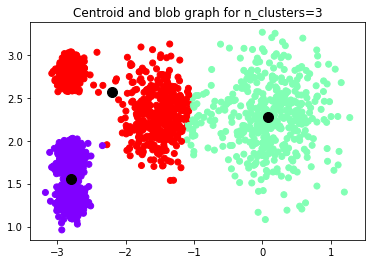

In [17]:
k_models(3)

Centroid for n_clusters= 8
[[-2.80446936  1.79959228]
 [-0.24138674  2.37733313]
 [-2.80180006  2.79464334]
 [-1.37406794  2.49222109]
 [ 0.45250828  2.54613863]
 [-2.80379109  1.30017997]
 [-1.60989642  2.10225416]
 [ 0.24028651  1.82284086]]

Interia value for k= 8 is:  121.60198303182476





<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

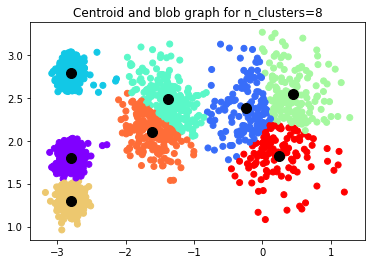

In [18]:
k_models(8)

In [19]:
# We can observe the difference in interia value for k = 3(646.230269055688) and k = 8(121.5217204971083) 

In [20]:
#interia as a function of k 
wcss = [] #within cluster sum of squares

for i in range(2, 11):
    #kmeans_new = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans_new = KMeans(n_clusters=i)
    kmeans_new.fit(X)
    wcss.append(kmeans_new.inertia_)

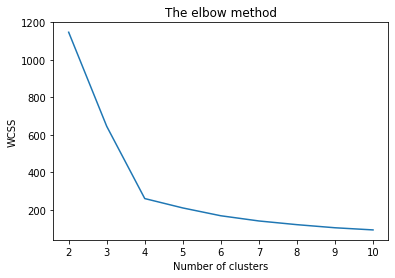

In [21]:
#Using elbow method to finnd optimal solution
plt.plot(range(2, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()
#Value of k at elbow is k = 4